 #  <p style="text-align: center;">ALL_LIFE CREDIT CARD CUSTOMER SEGMENTATION

**Objective:** To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

In this analysis I am going to segment credit card customers and group those that have similar characteristics in order to define the marketing strategy and provide feedback on the below key questions. 


**Key Questions:**
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

In performing the Credit Card Customer Segmentation analysis, i am going to use K-means.

###  Load the libraries:

In [1]:
# Numerical libraries
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.cm as cm
%matplotlib inline 

#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics

##Scale the data
from scipy.stats import zscore

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

# HierarchialClustering
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

###  Import data files as data frames: 

In [2]:
Customer_Data = pd.read_excel("Credit_Card_Customer_Data.xlsx")

In [3]:
Customer_Data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Data Quality Checks:

**Check for null values**

In [4]:
Customer_Data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There are no missing values in the dataset.

**Check the Dimension of data**

In [5]:
Customer_Data.shape

(660, 7)

In [6]:
Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


There are 660 Observations of data input / rows and 7 data fields attributes / columns. All of the variables are Intergers.  

In [7]:
Customer_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


## EXPLORATORY DATA ANALYTICS (EDA)

### Univariate Analysis:
Display univariate plots of the attributes: 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online' and 'Total_calls_made' from the respective Credit Card Customer Data set.

In [8]:
EDA_Columns = list(Customer_Data)[2:7]
print(EDA_Columns)

['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


**Histogram plots for important independent numeric variables**

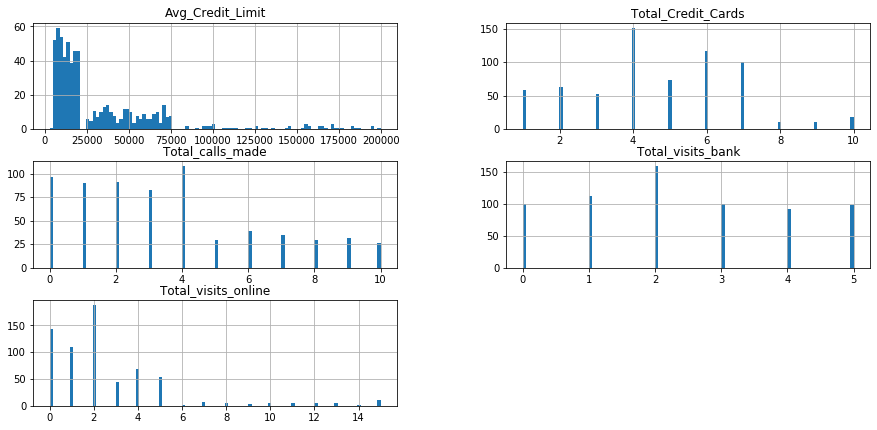

In [9]:
Customer_Data[EDA_Columns].hist(stacked=False, bins=100, figsize=(15,35), layout=(14,2)); 
# Histogram of the numeric data columns

#### Analysis Credit Card Customer Data set:

Some key features of the Credit Card Customer Data Set include: 
- The Mean number of credit card held by a customer is: 4.7
- The range in the number of credit cards is between 1 and 10
- There is a significant range in the average credit limit granted to customers
- The majority of customers have a total number of visits to the bank branch of between 1 and 3


Below we shall perform bivariate analysis of the Credit Card customer data to explore further the data characteristics. 

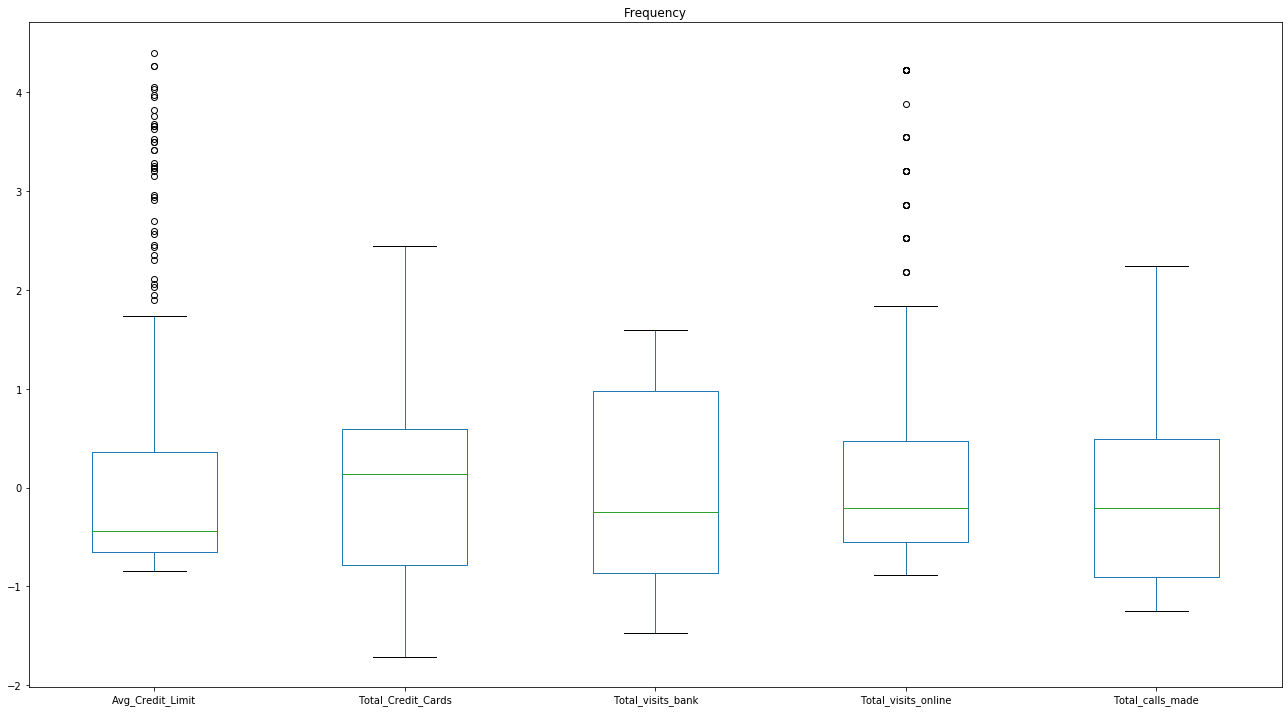

In [10]:
#let´s see how are distributed the frequency variables

DF = Customer_Data.apply(zscore)

DF[EDA_Columns].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

# There are also many outliers, but we will keep then for now

The above analysis reveals some outliers, however we will elect to keep then for now as they may hold descriptive value for the Exploratory Data Analytics [EDA] procedures. 

## FEATURE EGINEERING

Perform any feature engineering/transformation and remove any duplicate or irrelevant columns:

In [11]:
# Let us now remove duplicate/irrelevant columns

Customer_Data_Updated = Customer_Data.drop(['Sl_No','Customer Key'], axis =1)

Customer_Data_Updated.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


The 'S1_No' and 'Customer Key' are merely customer identification fields, thus hold no descriptive value for my data set and thus may be dropped to improve the performance of the customer segmentation analysis performed. 

### Bivariate Analysis:

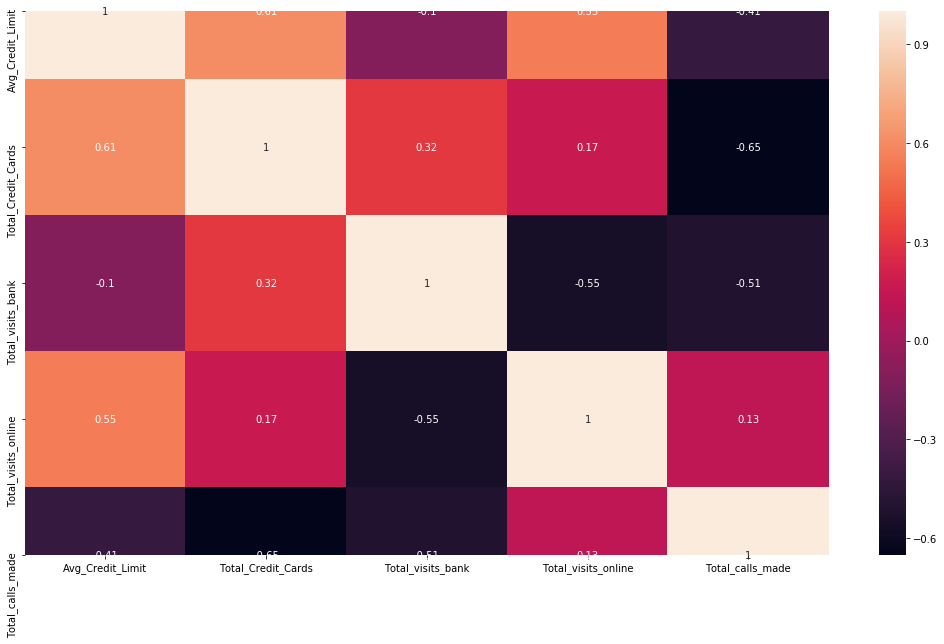

In [12]:
#Lets take a look at how the  variables are correlated
plt.figure(figsize=(18,10))
sns.heatmap(Customer_Data_Updated.corr(),annot=True);

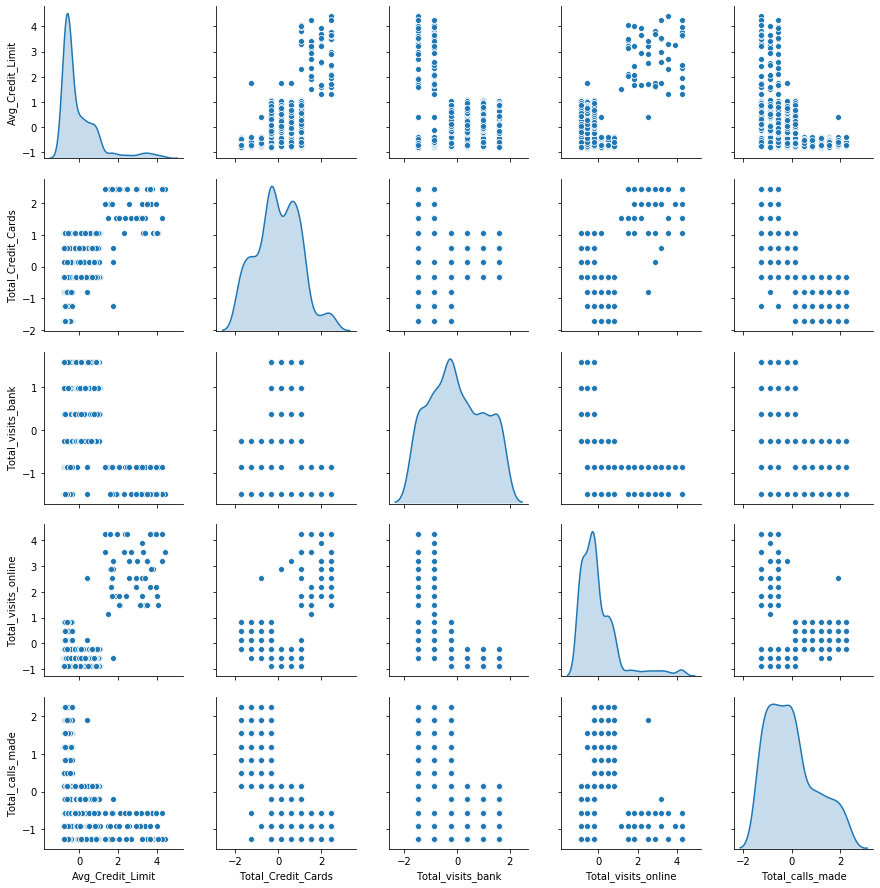

In [13]:
Customer_Data_Scaled=Customer_Data_Updated.apply(zscore)
sns.pairplot(Customer_Data_Scaled,diag_kind='kde')

#### Observations from bivariate Credit Card Customer Data set:

Some key observations from the bivariate analysis of the Credit Card Customer Data Set include: 
- There appears to be strong correlation between the number of credit cards and the total average value of the credit facility
- Customers how hold more credit cards appear to make use of online services
- Vists to the branches and call center opperations still appear to be well used by the customers in the dataset. 

## GROUP DATA INTO SIMILAR CLUSTERS

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

### ELBOW METHOD

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

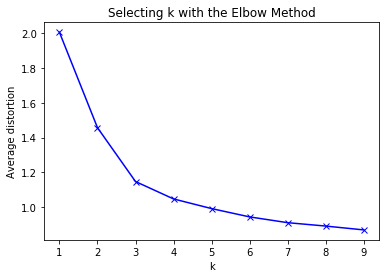

In [14]:
#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Customer_Data_Scaled)
    prediction=model.predict(Customer_Data_Scaled)
    meanDistortions.append(sum(np.min(cdist(Customer_Data_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / Customer_Data_Scaled
                           .shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


It is evident that there is an 'Elbow' bend at 3 and perhaps another relevant 'Elbow' bend at 4 clusters. Let us look at 3 clusters and 4 clusters. 

### LETS START WITH K=4 CLUSTERS

In [15]:
#Set the value of k=4
kmeans_4_Model = KMeans(n_clusters=4, n_init = 5, random_state=1)
kmeans_4_Model.fit(Customer_Data_Scaled)

prediction=kmeans_4_Model.predict(Customer_Data_Scaled)

#Append the prediction 
Customer_Data_K4 = Customer_Data
Customer_Data_Scaled_k4 = Customer_Data_Scaled
Customer_Data_K4["Cluster_Group"] = prediction
Customer_Data_Scaled_k4["Cluster_Group"] = prediction
print("Groups Assigned : \n")
Customer_Data_K4.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_Group
0,1,87073,100000,2,1,1,0,3
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,3
3,4,40496,30000,5,1,1,4,3
4,5,47437,100000,6,0,12,3,2


### ANALYZE THE DISTRIBUTION OF THE DATA AMONGST THE CLUSTER GROUPS (K = 4)

Check the count of customers in each cluster:

0    221
3    199
1    190
2     50
Name: Cluster_Group, dtype: int64

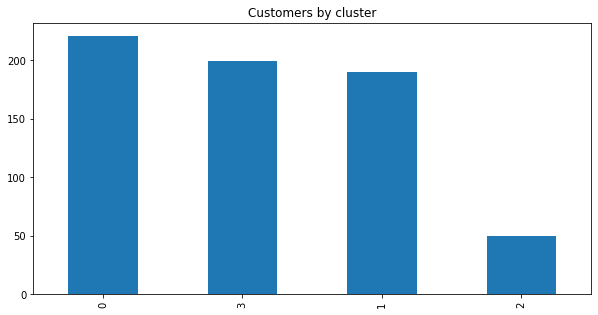

In [16]:
# Number of clients by cluster
Customer_Data_K4['Cluster_Group'].value_counts().plot.bar(figsize=(10,5), title='Customers by cluster');

Customer_Data_K4["Cluster_Group"].value_counts()  


In [17]:
Customer_Data_Clust_K4 = Customer_Data_K4.groupby(["Cluster_Group"])
Customer_Data_Clust_K4.describe().transpose()

Cluster_Group                         0             1              2  \
Sl_No               count    221.000000    190.000000      50.000000   
                    mean     117.805430    415.363158     611.280000   
                    std       64.234536    113.546437     125.557701   
                    min        2.000000    231.000000       5.000000   
                    25%       63.000000    312.500000     623.250000   
                    50%      118.000000    413.500000     635.500000   
                    75%      173.000000    516.750000     647.750000   
                    max      228.000000    612.000000     660.000000   
Customer Key        count    221.000000    190.000000      50.000000   
                    mean   55257.135747  55714.684211   56708.760000   
                    std    26117.181386  25862.836910   26862.130097   
                    min    11412.000000  11398.000000   13315.000000   
                    25%    33187.000000  33948.250000   32897.250000   
                    50%    55275.000000  54492.000000   53875.000000   
                    75%    76718.000000  77779.750000   79713.750000   
                    max    99596.000000  99473.000000   99843.000000   
Avg_Credit_Limit    count    221.000000    190.000000      50.000000   
                    mean   12167.420814  31226.315789  141040.000000   
                    std     5263.426740  21659.127922   34457.877272   
                    min     3000.000000   5000.000000   84000.000000   
                    25%     8000.000000  12000.000000  108750.000000   
                    50%    12000.000000  28000.000000  145500.000000   
                    75%    16000.000000  47000.000000  170000.000000   
                    max    50000.000000  75000.000000  200000.000000   
Total_Credit_Cards  count    221.000000    190.000000      50.000000   
                    mean       2.393665      5.478947       8.740000   
                    std        1.097002      1.139516       1.274715   
                    min        1.000000      4.000000       5.000000   
                    25%        1.000000      4.000000       8.000000   
                    50%        2.000000      6.000000       9.000000   
                    75%        3.000000      6.000000      10.000000   
                    max        4.000000      7.000000      10.000000   
Total_visits_bank   count    221.000000    190.000000      50.000000   
                    mean       0.927602      4.515789       0.600000   
                    std        0.800118      0.501071       0.494872   
                    min        0.000000      4.000000       0.000000   
                    25%        0.000000      4.000000       0.000000   
                    50%        1.000000      5.000000       1.000000   
                    75%        2.000000      5.000000       1.000000   
                    max        2.000000      5.000000       1.000000   
Total_visits_online count    221.000000    190.000000      50.000000   
                    mean       3.574661      1.010526      10.900000   
                    std        1.209842      0.878849       2.880264   
                    min        1.000000      0.000000       6.000000   
                    25%        3.000000      0.000000       8.000000   
                    50%        4.000000      1.000000      11.000000   
                    75%        4.000000      2.000000      13.000000   
                    max       10.000000      2.000000      15.000000   
Total_calls_made    count    221.000000    190.000000      50.000000   
                    mean       6.923077      1.936842       1.080000   
                    std        1.944330      1.409045       0.876915   
                    min        2.000000      0.000000       0.000000   
                    25%        5.000000      1.000000       0.000000   
                    50%        7.000000      2.000000       1.000000   
                    75%        9.000000 

In [18]:
# Creating a dataframe for the centroids
centroids=kmeans_4_Model.cluster_centers_
index=['C0','C1','C2','C3']
columns=["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank","Total_visits_online","Total_calls_made",]
centroid_df=pd.DataFrame(centroids,index,columns)
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
C0,-0.595974,-1.067493,-0.904851,0.330186,1.166460
C1,-0.089048,0.356795,1.295713,-0.543901,-0.575064
C2,2.831764,1.862226,-1.105763,2.827319,-0.874330
C3,0.035383,0.376953,0.045601,-0.557768,-0.526678


### INFORMATIVE VISUAL TOOLS TO ANALYSE THE CUSTOMER SEGMENTS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252610FF308>,
      dtype=object)

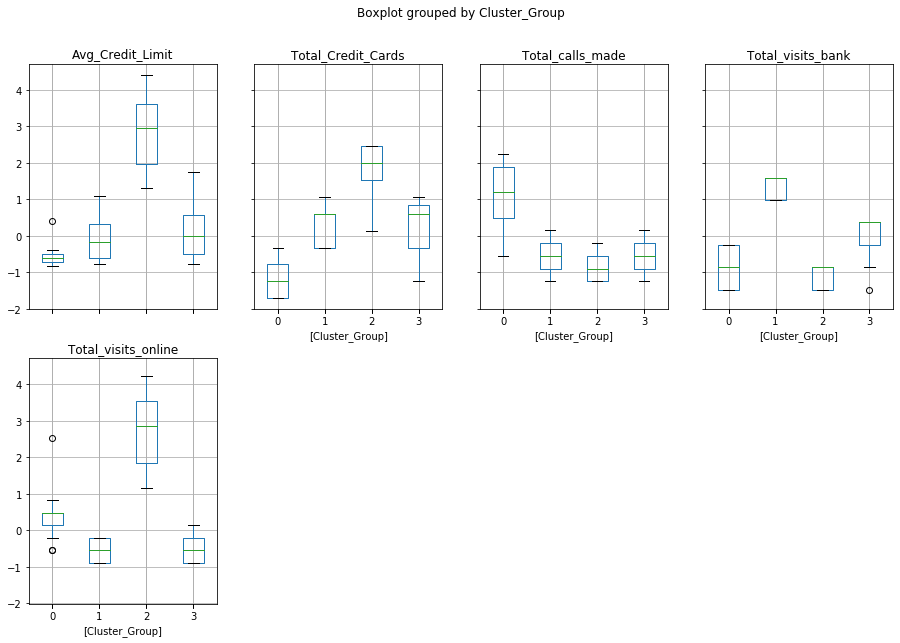

In [19]:
Customer_Data_Scaled_k4.boxplot(by='Cluster_Group', layout = (2,4),figsize=(15,10))

Text(0.5, 0.92, '3D plot of KMeans Clustering')

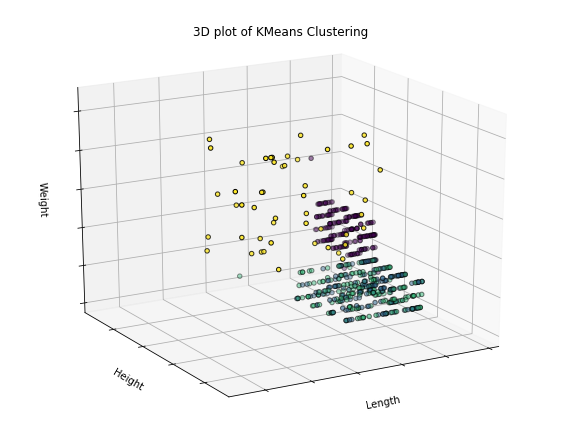

In [20]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans_4_Model.fit(Customer_Data_Scaled)
labels = kmeans_4_Model.labels_
ax.scatter(Customer_Data_Scaled_k4.iloc[:, 0], Customer_Data_Scaled_k4.iloc[:, 1], Customer_Data_Scaled_k4.iloc[:, 3], c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


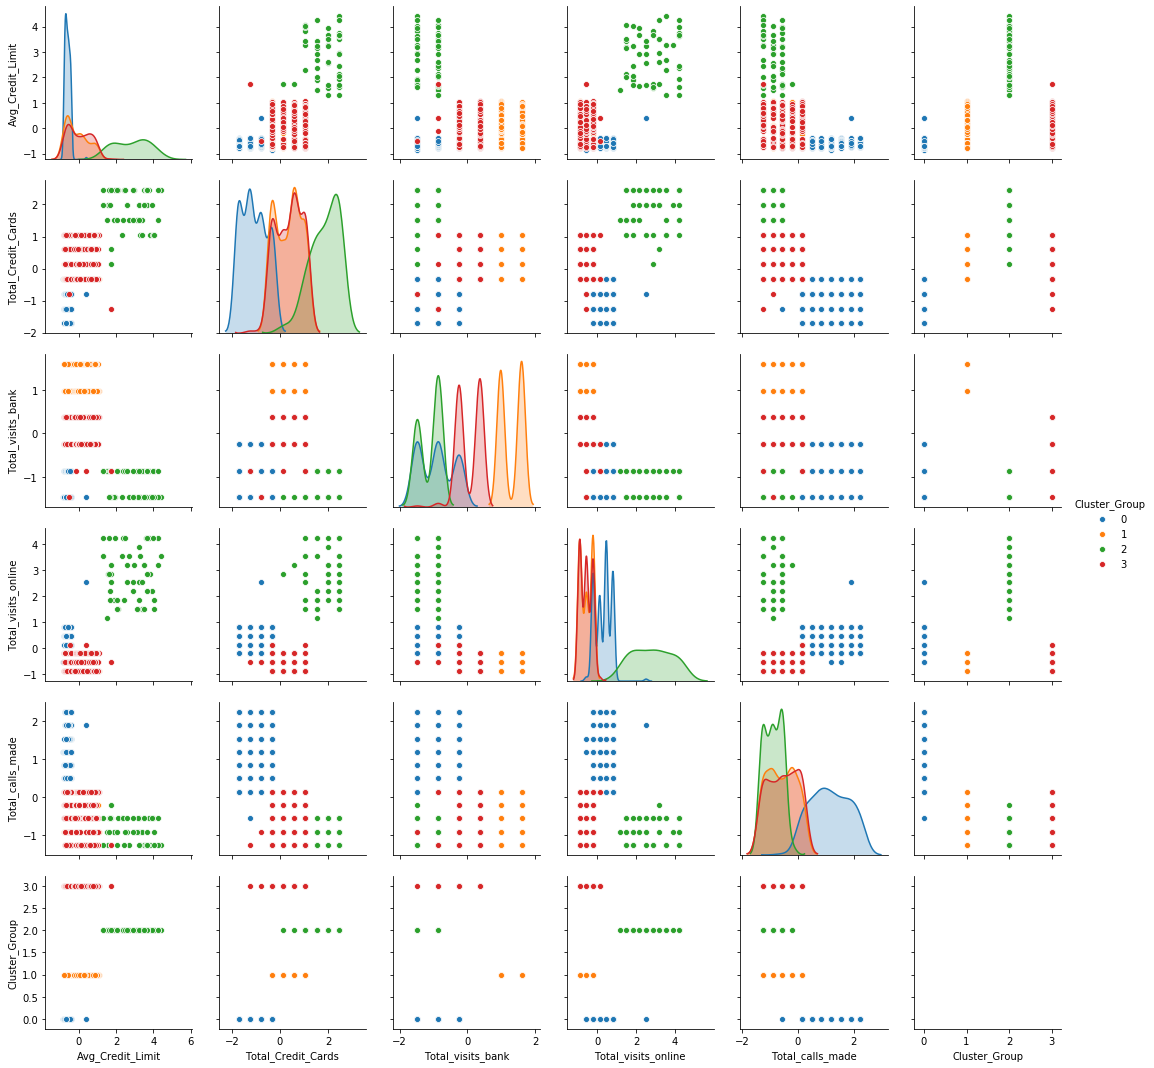

In [21]:
sns.pairplot(Customer_Data_Scaled_k4, hue= "Cluster_Group")

The goal was to segment the customers in order to define a marketing strategy.

### CHARACTER OF CLUSTERS AND SUGGESTED TREATMENTS 

**CLUSTER 0:**

This segment is characterised by customers who have the lowest total number of credit cards and lowest average credit facility. These customers prefer servicing via phone calls, having the largest call volumes of all the customer segments. The group is seems adept at using the banks online services having demonstrated moderate online activity. No value is demonstrated by branch services for this customer segment as they exhibit a low number of total branch visits.

Key Cluster Facts: 
- Number of customers in the cluster: 221  (largest cluster group)
- Mean average Total_Credit_Facility: 1 2167.42 (lowest of all the clusters)
- Mean total number of credit cards: 2.4 (lowest of all the clusters)
- Highest mean Total_Calls_Made of all the clusters: 6.92
- Second largest online activity of the clusters: 3.57 (mean "Total_Visits_Online")
- Second lowest mean "Total_Bank_Vists": 0.93

**Market Campaign Suggested Treatments**

This cluster may represent 'New Card Holders' and/or cardholders who use their card infrequently or for low-ticket items

For cardholders who use their card infrequently or for low-ticket items, you may be able to capture more usage with spend-and-get offers or bill pay campaigns. The program should also identify cardholders at risk of becoming inactive and reach out to them. The goal is to encourage repeat usage, preferably in high-volume purchase product categories such as fuel and groceries. 
 
The suggested market campaign should engage With New Cardholders Early and Often. The first 45 days after a new credit card account is opened are critical for establishing a strong cardholder relationship. An “early-month” on-board program that reinforces the value proposition of the credit card and encourages use helps develop the type of spending habits needed to become a top of credit card customer.

*Note: this is an important market segment cluster as it represents the majority of the customer data market, thus holds the most opportunity to benefit from a successful targeted marketing campaign.*

**Recommendations on how to better service this customer segment**

As demonstrated by the above analysis, this customer segment has a preference of being serviced via a combination of call center’s and online service facilities. Management could focus and/or increase the number of their call center agents to target servicing operations for this customer segment. Investment in Online Self service facilities may also serve valuable in improving servicing operations for this customer segment. 

No value would be demonstrated by improving branch services for this customer segment as they exhibit a low number of total branch visits.

**CLUSTER 1:**

This segment is characterised by customers who have the 2nd lowest total number of credit cards, however a moderate credit facility. These customers prefer in person services at the branch, demonstrating the largest number of total branch visits amongst the customer segments. No value is demonstrated by investing in online tech self services for this customer segment as they exhibit a low online activity.

Key Cluster Facts: 
- Number of customers in the cluster: 199  (2nd largest cluster group)
- Mean average Total_Credit_Facility: 35 904.5(3rd largest of all the clusters)
- Mean "Total_number" of credit cards: 5.47 (2nd lowest of all the clusters)
- Mean Total_Calls_Made of all the clusters: 2.07
- Third highest online activity of the clusters: 1 (mean "Total_Visits_Online")
- Highest mean "Total_Bank_Vists": 2.47

**Market Campaign Suggested Treatments**

This segment is characterised by customers with one of the higher average credit limits however, the number of credit card usage is low. These are prime customers that the credit card provider can entice to increase their spending habits by raising their credit limits even more.

**Recommendations on how to better service this customer segment**

As demonstrated by the above analysis, this customer segment has a preference of being serviced in person services at the branch. There is no business need to invest in online or call center agents to provide servicing to this particular customer segment.   

#### CLUSTER 2:
With only 50 customers it is the smallest of all the customer segments, and appears to represent the characteristics of the credit providers "most valued of the credit card customers" segment. Characterised by customers who have the Highest total number of credit cards, and the most significant use of credit facilities. These customers prefer interacting with the credit provider via online service platforms. No value is demonstrated by branch services for this customer segment as they exhibit a low number of total branch visits. It is evident that this customer segment does not make use of the credit providers call centers and/or branch service offerings. 

Key Cluster Facts: 
- Number of customers in the cluster: 50 (smallest cluster group)
- Mean average Total_Credit_Facility: 141 040 (Significantly the highest of all the clusters)
- Mean "Total_number" of credit cards: 8.7 (Significantly highest of all the clusters)
- Mean Total_Calls_Made of all the clusters: 1.08
- Highest online activity of the clusters: 10.9 (mean "Total_Visits_Online")
- Lowest mean "Total_Bank_Vists": 0.49

**Market Campaign Suggested Treatments** 

Management will want to focus its efforts on retaining and expanding this customer segment as it represents the "most valued credit card customer" segment, having the highest credit limits and number of credit cards. This customer segment is probably already at its max capacity for credit spending thus limited opportunity exist to increase credit spending habits for this segment. Management’s efforts are thus probably better focused at retaining and expanding this segment in their campaign. To retain the customer segment management should consider investing and improving online product(s) and service offerings which is clearly demonstrated as being valuable to this customer segment.

For cardholders who spend frequently, a good approach might be to encourage digital wallet usage and give them more spending power with a credit line increase

Recommendations on how to better service this customer segment

Management must invest in improving their online tech facilities in order to best service and retain this customer market segment. It is evident that this customer segment does not make use of the credit providers call centers and/or branch service offerings. 

No value would be demonstrated by improving branch services for this customer segment as they exhibit the lowest number of total branch visits across all the customer segments. 

**CLUSTER 3:**

This segment is characterised by customers who have both the 2nd highest mean total number of credit card and total average credit facility. The cluster segment is the second largest segment with a count of 199 customers. This is a valuable segment as the credit provider can target this segment to encourage them to move to the "most valued credit card customer segment". These customers prefer in person services at the branch and call center services, demonstrated by the second largest number of total branch visits and total calls amongst the customer segments. No value is demonstrated by investing in online tech self services for this customer segment as they exhibit the lowest levels off online activity amongst the clusters.

Key Cluster Facts: 
- Number of customers in the cluster: 199  (2nd largest cluster group)
- Mean average Total_Credit_Facility: 31 226.31 (2nd Highest of all the clusters)
- Mean "Total_number" of credit cards: 5.5 (2nd Highest of all the clusters)
- Mean Total_Calls_Made of all the clusters: 1.92
- Lowest online activity of the clusters: 0.96 (mean "Total_Visits_Online")
- 2nd Highest mean "Total_Bank_Vists": 2.47

**Market Campaign Suggested Treatments**

This segment is characterised by customers with one of the higher average credit limits and total number of credit card usage. These are prime customers that the credit card provider can entice to increase their spending habits by raising their credit limits even more to move them to the most profitable customer segment. The credit provider should increase credit limits and perform targeted marketing campaigns to increase credit spending volumes on everyday transactional purchases to target this segment. 

**Recommendations on how to better service this customer segment**

As demonstrated by the above analysis, this customer segment has a preference of being serviced in person services at the branch or via call center services. There is no business need to invest in online tech facilities to provide servicing to this customer segment.   

### LET US NEXT TRY WITH K=3 CLUSTERS  (next elbow point)

In [22]:
#Set the value of k=3
kmeans_3_Model = KMeans(n_clusters=3, n_init = 3, random_state=1)
kmeans_3_Model.fit(Customer_Data_Scaled)

prediction=kmeans_3_Model.predict(Customer_Data_Scaled)

#Append the prediction 
Customer_Data_K3 = Customer_Data
Customer_Data_Scaled_k3 = Customer_Data_Scaled
Customer_Data_K3["Cluster_Group"] = prediction
Customer_Data_Scaled_k3["Cluster_Group"] = prediction
print("Groups Assigned : \n")
Customer_Data_K3.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_Group
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,2
4,5,47437,100000,6,0,12,3,2


### ANALYZE THE DISTRIBUTION OF THE DATA AMONGST THE CLUSTER GROUPS

Check the count of customers in each cluster:

2    249
0    221
1    190
Name: Cluster_Group, dtype: int64

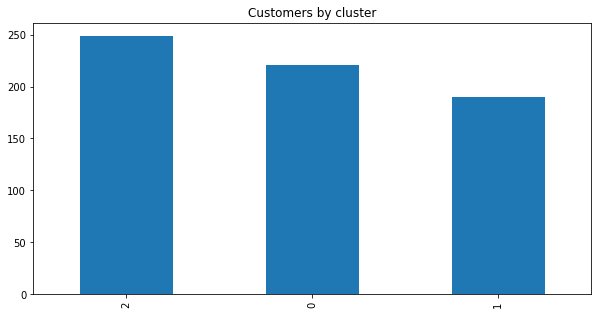

In [23]:
Customer_Data_K3['Cluster_Group'].value_counts().plot.bar(figsize=(10,5), title='Customers by cluster');

Customer_Data_K3["Cluster_Group"].value_counts()  

In [24]:
Customer_Data_Clust_K3 = Customer_Data_K3.groupby(["Cluster_Group"])
Customer_Data_Clust_K3.describe().transpose()

Cluster_Group                         0             1              2
Sl_No               count    221.000000    190.000000     249.000000
                    mean     117.805430    415.363158     454.522088
                    std       64.234536    113.546437     147.797460
                    min        2.000000    231.000000       1.000000
                    25%       63.000000    312.500000     351.000000
                    50%      118.000000    413.500000     470.000000
                    75%      173.000000    516.750000     584.000000
                    max      228.000000    612.000000     660.000000
Customer Key        count    221.000000    190.000000     249.000000
                    mean   55257.135747  55714.684211   54601.349398
                    std    26117.181386  25862.836910   25096.481965
                    min    11412.000000  11398.000000   11265.000000
                    25%    33187.000000  33948.250000   34775.000000
                    50%    55275.000000  54492.000000   52363.000000
                    75%    76718.000000  77779.750000   76398.000000
                    max    99596.000000  99473.000000   99843.000000
Avg_Credit_Limit    count    221.000000    190.000000     249.000000
                    mean   12167.420814  31226.315789   57016.064257
                    std     5263.426740  21659.127922   49173.898783
                    min     3000.000000   5000.000000    5000.000000
                    25%     8000.000000  12000.000000   18000.000000
                    50%    12000.000000  28000.000000   47000.000000
                    75%    16000.000000  47000.000000   70000.000000
                    max    50000.000000  75000.000000  200000.000000
Total_Credit_Cards  count    221.000000    190.000000     249.000000
                    mean       2.393665      5.478947       6.168675
                    std        1.097002      1.139516       1.749327
                    min        1.000000      4.000000       2.000000
                    25%        1.000000      4.000000       5.000000
                    50%        2.000000      6.000000       6.000000
                    75%        3.000000      6.000000       7.000000
                    max        4.000000      7.000000      10.000000
Total_visits_bank   count    221.000000    190.000000     249.000000
                    mean       0.927602      4.515789       2.100402
                    std        0.800118      0.501071       0.929989
                    min        0.000000      4.000000       0.000000
                    25%        0.000000      4.000000       2.000000
                    50%        1.000000      5.000000       2.000000
                    75%        2.000000      5.000000       3.000000
                    max        2.000000      5.000000       3.000000
Total_visits_online count    221.000000    190.000000     249.000000
                    mean       3.574661      1.010526       2.963855
                    std        1.209842      0.878849       4.254350
                    min        1.000000      0.000000       0.000000
                    25%        3.000000      0.000000       0.000000
                    50%        4.000000      1.000000       1.000000
                    75%        4.000000      2.000000       2.000000
                    max       10.000000      2.000000      15.000000
Total_calls_made    count    221.000000    190.000000     249.000000
                    mean       6.923077      1.936842       1.875502
                    std        1.944330      1.409045       1.415839
                    min        2.000000      0.000000       0.000000
                    25%        5.000000      1.000000       1.000000
                    50%        7.000000      2.000000       2.000000
                    75%        9.000000      3.000000       3.000000
                    max       10.000000      4.000000       4.000000

In [25]:
# Creating a dataframe for the centroids
centroids=kmeans_3_Model.cluster_centers_
index=['C0','C1','C2']
columns=["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank","Total_visits_online","Total_calls_made", "Cluster_Group"]
centroid_df=pd.DataFrame(centroids,index,columns)
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_Group
C0,-0.595974,-1.067493,-0.904851,0.330186,1.166460,-3.774758e-15
C1,-0.089048,0.356795,1.295713,-0.543901,-0.575064,1.000000e+00
C2,0.596905,0.675201,-0.185596,0.121969,-0.596488,2.799197e+00


In [26]:
# let us check the centers in each group
centroids = kmeans_3_Model.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(Customer_Data_Scaled_k3) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,-5.959741e-01,-0.089048,0.596905
Total_Credit_Cards,-1.067493e+00,0.356795,0.675201
Total_visits_bank,-9.048510e-01,1.295713,-0.185596
Total_visits_online,3.301859e-01,-0.543901,0.121969
Total_calls_made,1.166460e+00,-0.575064,-0.596488
Cluster_Group,-3.774758e-15,1.000000,2.799197


### INFORMATIVE VISUAL TOOLS TO ANALYSE THE CUSTOMER SEGMENTS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252652CFA88>,
      dtype=object)

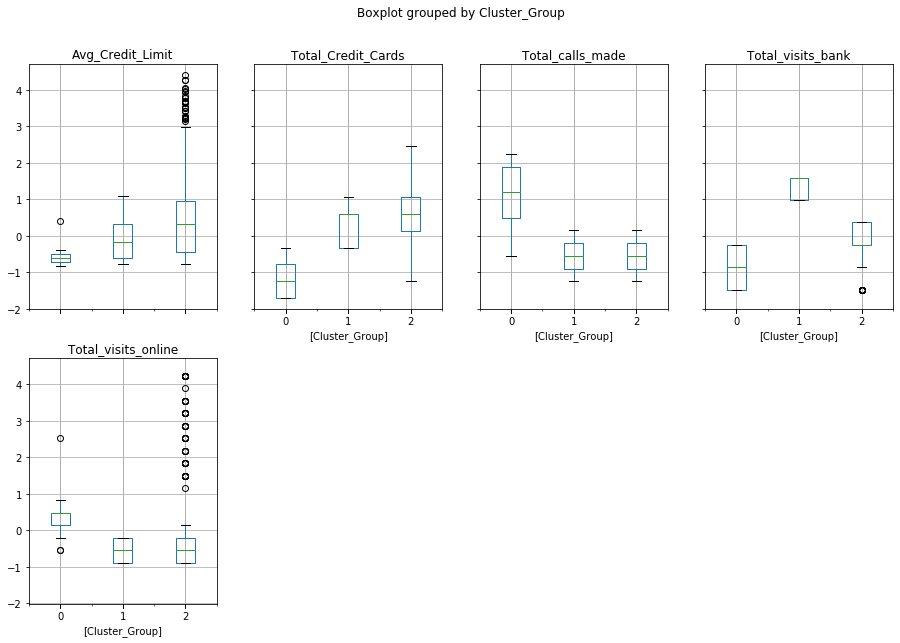

In [27]:
Customer_Data_Scaled_k3.boxplot(by='Cluster_Group', layout = (2,4),figsize=(15,10))

Text(0.5, 0.92, '3D plot of KMeans Clustering')

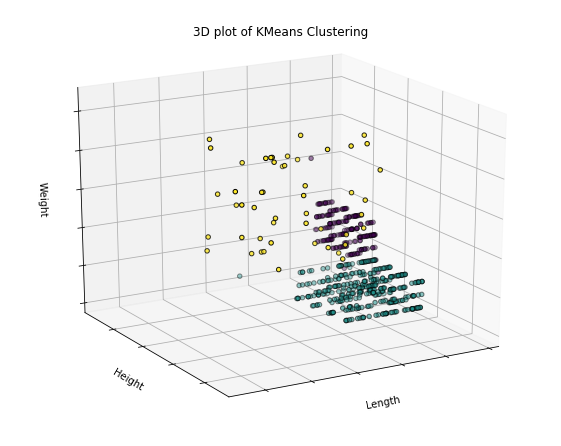

In [28]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans_3_Model.fit(Customer_Data_Scaled)
labels = kmeans_3_Model.labels_
ax.scatter(Customer_Data_Scaled_k3.iloc[:, 0], Customer_Data_Scaled_k3.iloc[:, 1], Customer_Data_Scaled_k3.iloc[:, 3], c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


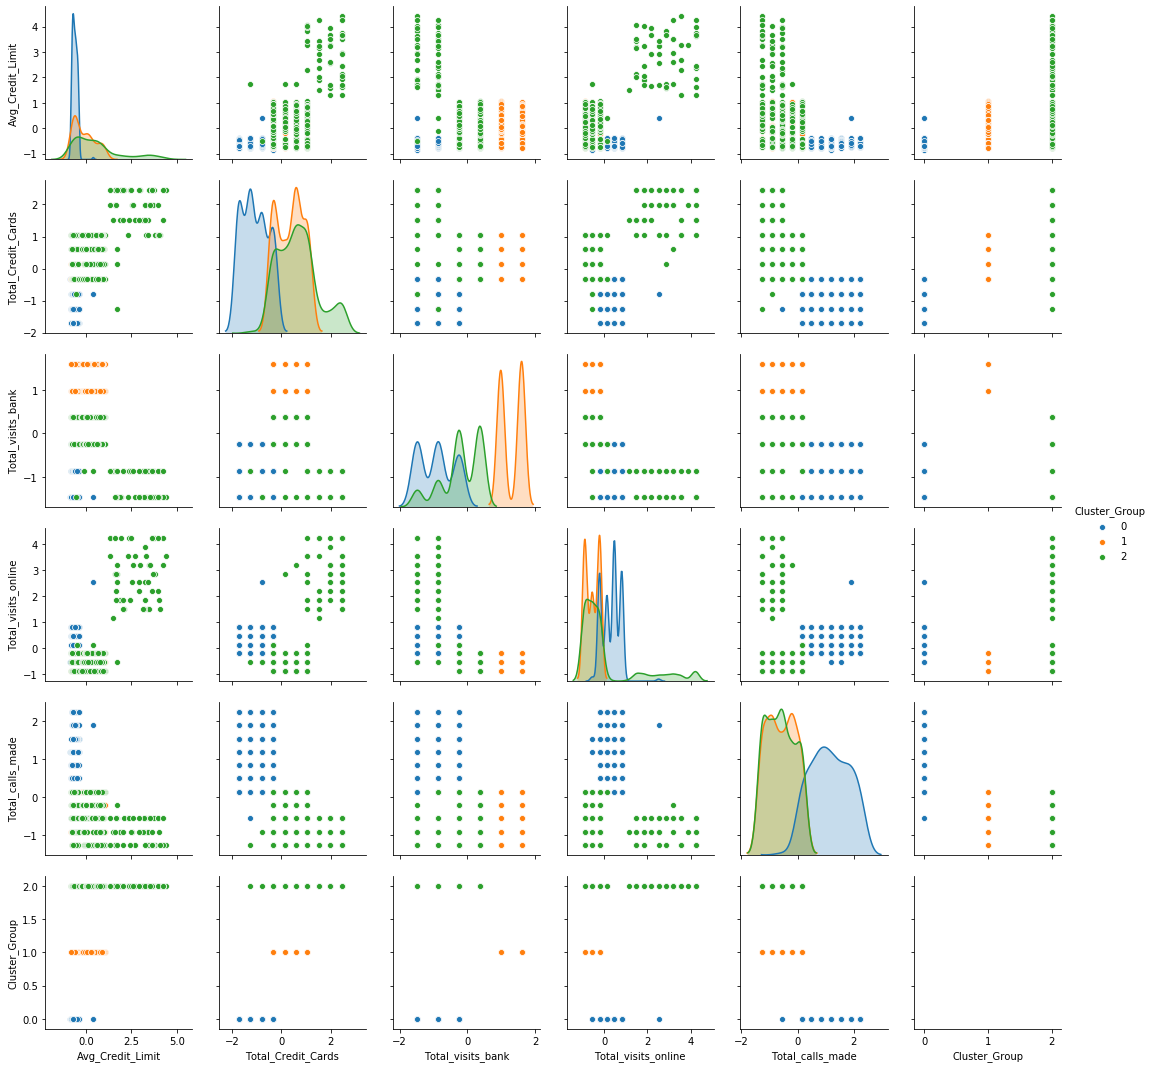

In [29]:
sns.pairplot(Customer_Data_Scaled_k3, hue= "Cluster_Group")

### CHARACTER OF CLUSTERS AND SUGGESTED TREATMENTS 

**CLUSTER 0:**

This segment is characterised by customers who have the lowest total number of credit cards and lowest average credit facility. These customers prefer servicing via phone calls, having the largest call volumes of all the customer segments. The group is seems adept at using the banks online services having demonstrated moderate online activity. No value is demonstrated by branch services for this customer segment as they exhibit a low number of total branch visits.

Key Cluster Facts: 
- Number of customers in the cluster: 221  (2nd largest cluster group)
- Mean average Total_Credit_Facility: 12 167.42 (lowest of all the clusters)
- Mean total number of credit cards: 2.39 (lowest of all the clusters)
- Highest mean Total_Calls_Made of all the clusters: 6.92
- Second largest online activity of the clusters: 3.57 (mean "Total_Visits_Online")
- Second lowest mean "Total_Bank_Vists": 0.93

**Market Campaign Suggested Treatments**

This cluster may represent 'New Card Holders' and/or cardholders who use their card infrequently or for low-ticket items

For cardholders who use their card infrequently or for low-ticket items, you may be able to capture more usage with spend-and-get offers or bill pay campaigns. The program should also identify cardholders at risk of becoming inactive and reach out to them. The goal is to encourage repeat usage, preferably in high-volume purchase product categories such as fuel and groceries. 
 
The suggested market campaign should engage With New Cardholders Early and Often. The first 45 days after a new credit card account is opened are critical for establishing a strong cardholder relationship. An “early-month” on-board program that reinforces the value proposition of the credit card and encourages use helps develop the type of spending habits needed to become a top of credit card customer.

*Note: this is an important market segment cluster as it represents the majority of the customer data market, thus holds the most opportunity to benefit from a successful targeted marketing campaign.*

**Recommendations on how to better service this customer segment**

As demonstrated by the above analysis, this customer segment has a preference of being serviced via a combination of call center’s and online service facilities. Management could focus and/or increase the number of their call center agents to target servicing operations for this customer segment. Investment in Online Self service facilities may also serve valuable in improving servicing operations for this customer segment. 

No value would be demonstrated by improving branch services for this customer segment as they exhibit a low number of total branch visits.

**CLUSTER 1:**

This is the largest customer cluster segement, characterised by customers who have both the 2nd highest mean total number of credit card and total average credit facility. This is a valuable segment as the credit provider can target this segment to encourage them to move to the "most valued credit card customer segment". These customers prefer in person services at the branch and call center services, demonstrated by the second largest number of total branch visits and total calls amongst the customer segments. No value is demonstrated by investing in online tech self services for this customer segment as they exhibit the lowest levels off online activity amongst the clusters.

Key Cluster Facts: 
- Number of customers in the cluster: 389 (Largest cluster group)
- Mean average Total_Credit_Facility: 33 619.53 (2nd lowest of all the clusters)
- Mean total number of credit cards: 5.5 (2nd lowest of all the clusters)
- Mean Total_Calls_Made of all the clusters: 2
- Lowest online activity of the clusters: 0.98 (mean "Total_Visits_Online")
- Highest mean "Total_Bank_Vists": 3.47

**Market Campaign Suggested Treatments**
This segment is characterised by customers with one of the higher average credit limits and total number of credit card usage. These are prime customers that the credit card provider can entice to increase their spending habits by raising their credit limits even more to move them to the most profitable customer segment. The credit provider should increase credit limits and perform targeted marketing campaigns to increase credit spending volumes on everyday transactional purchases to target this segment. 

**Recommendations on how to better service this customer segment**

As demonstrated by the above analysis, this customer segment has a preference of being serviced in person services at the branch or via call center services. There is no business need to invest in online tech facilities to provide servicing to this customer segment.   

#### CLUSTER 2:
With only 50 customers it is the smallest of all the customer segments, and appears to represent the characteristics of the credit providers "most valued of the credit card customers" segment. Characterised by customers who have the Highest total number of credit cards, and the most significant use of credit facilities. These customers prefer interacting with the credit provider via online service platforms. No value is demonstrated by branch services for this customer segment as they exhibit a low number of total branch visits. It is evident that this customer segment does not make use of the credit providers call centers and/or branch service offerings. 

Key Cluster Facts: 
- Number of customers in the cluster: 50 (smallest cluster group)
- Mean average Total_Credit_Facility: 141 040 (Significantly the highest of all the clusters)
- Mean "Total_number" of credit cards: 8.7 (Significantly highest of all the clusters)
- Lowest Mean Total_Calls_Made of all the clusters: 1.08
- Highest online activity of the clusters: 10.9 (mean "Total_Visits_Online")
- Lowest mean "Total_Bank_Vists": 0.6

**Market Campaign Suggested Treatments** 

Management will want to focus its efforts on retaining and expanding this customer segment as it represents the "most valued credit card customer" segment, having the highest credit limits and number of credit cards. This customer segment is probably already at its max capacity for credit spending thus limited opportunity exist to increase credit spending habits for this segment. Management’s efforts are thus probably better focused at retaining and expanding this segment in their campaign. To retain the customer segment management should consider investing and improving online product(s) and service offerings which is clearly demonstrated as being valuable to this customer segment.  

For cardholders who spend frequently, a good approach might be to encourage digital wallet usage and give them more spending power with a credit line increase

Recommendations on how to better service this customer segment

Management must invest in improving their online tech facilities in order to best service and retain this customer market segment. It is evident that this customer segment does not make use of the credit providers call centers and/or branch service offerings. 

No value would be demonstrated by improving branch services for this customer segment as they exhibit the lowest number of total branch visits across all the customer segments. 

## PERFORM A SILLHOUETTE ANALYSIS 

For n_clusters = 2 The average silhouette_score is : 0.46195515267513587
For n_clusters = 3 The average silhouette_score is : 0.5495052501932319
For n_clusters = 4 The average silhouette_score is : 0.4442702106304834
For n_clusters = 5 The average silhouette_score is : 0.33255501655130393
For n_clusters = 6 The average silhouette_score is : 0.290304033630608


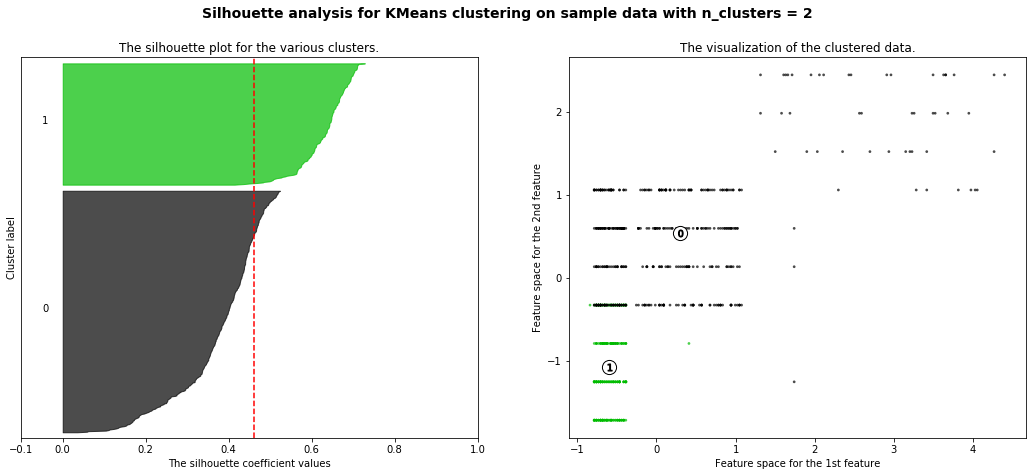

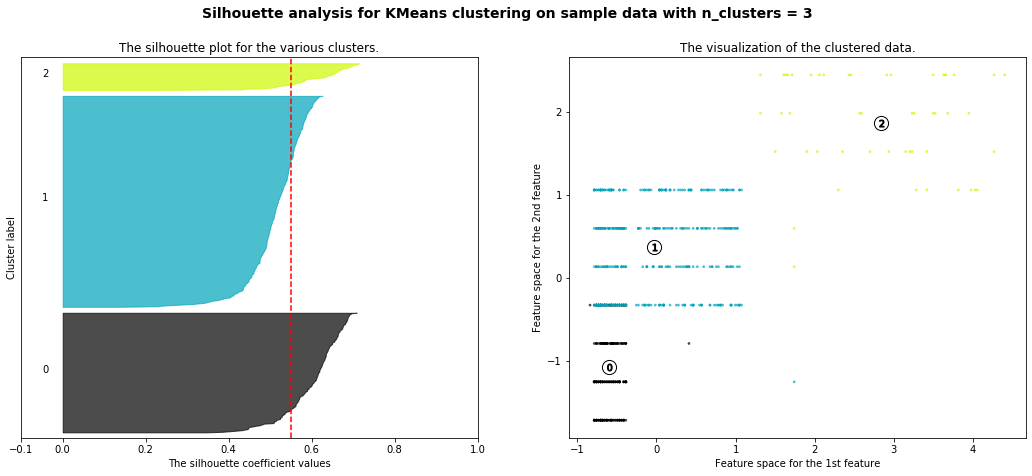

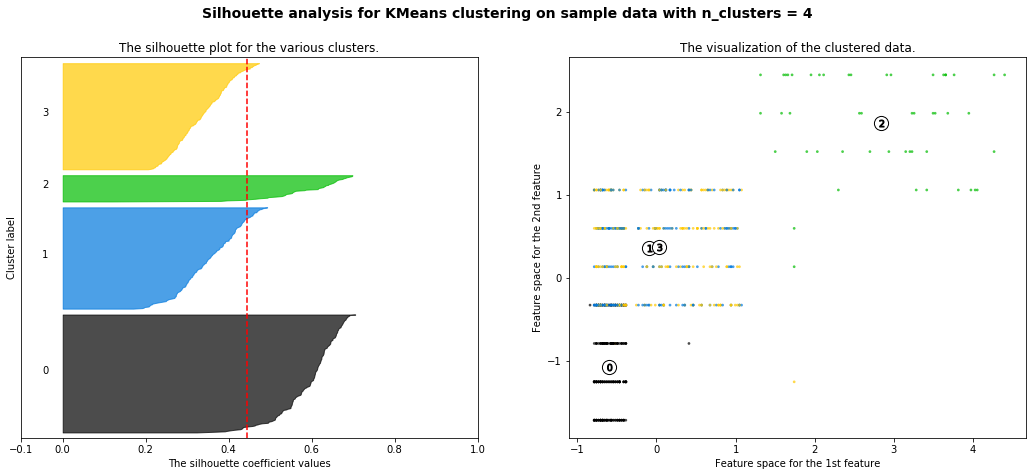

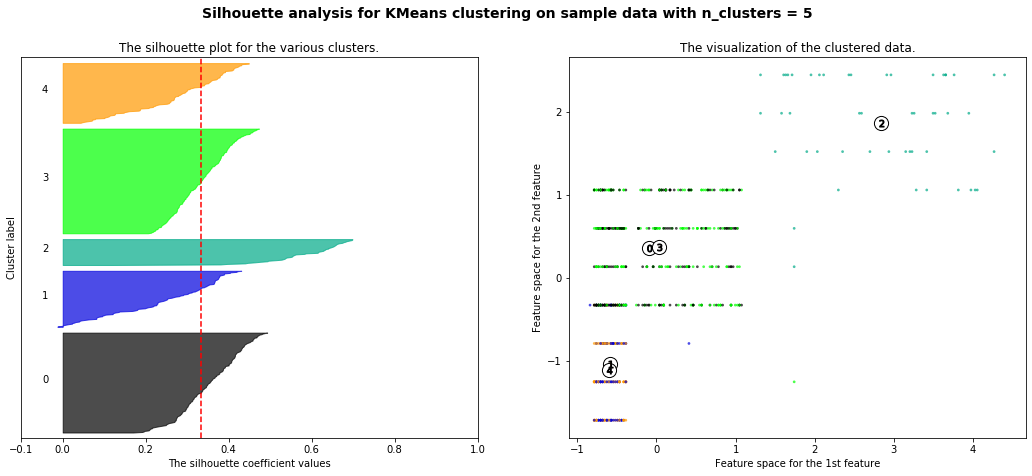

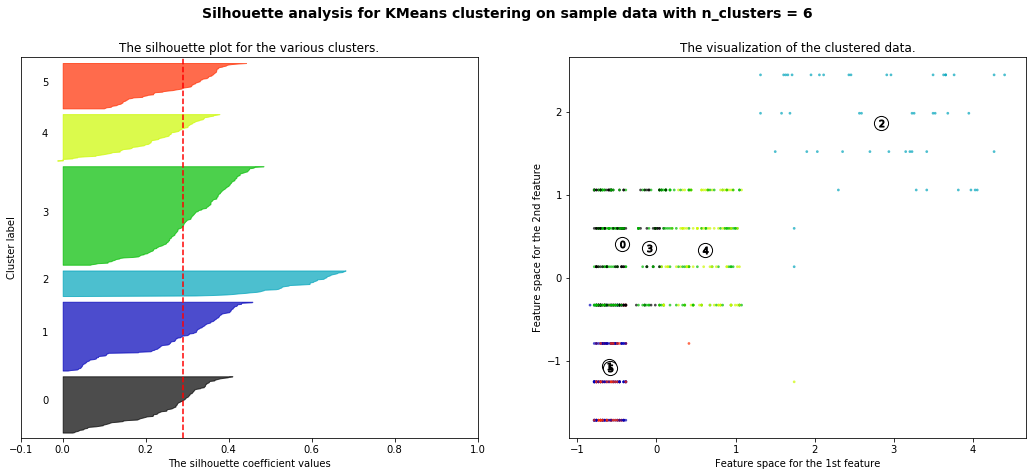

In [30]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Customer_Data_Scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(Customer_Data_Scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Customer_Data_Scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Customer_Data_Scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
     # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Customer_Data_Scaled.iloc[:, 0], Customer_Data_Scaled.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## HIERARCHIAL CLUSTERING -  CREDIT CARD CUSTOMER DATA

In [31]:
Hierarchical_Clust = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [32]:
Hierarchical_Clust.fit(Customer_Data_Scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [33]:
Customer_Data['labels'] = model.labels_
Customer_Data.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_Group,labels
0,1,87073,100000,2,1,1,0,2,8
1,2,38414,50000,3,0,10,9,0,6
2,3,17341,50000,7,1,3,4,2,8
3,4,40496,30000,5,1,1,4,2,8
4,5,47437,100000,6,0,12,3,2,4


In [34]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Customer_Data_Scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(Customer_Data_Scaled))

c

0.9210472013267003

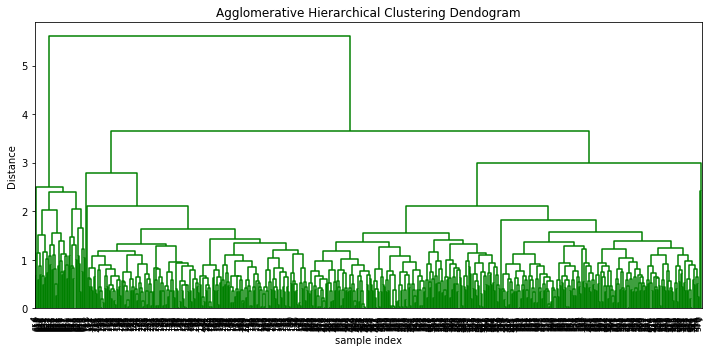

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

## CONCLUDING REMARKS - SUMMARY OF RESULTS FROM THE CREDIT CARD CUSTOMER SEGMENTATION ANALYSIS

We were able to build a clustering model that was able to segment our credit card users into distinctive groups. Understanding the behaviour of customers at this level of granularity is key to tailoring offers which improve customer retention and drive revenues.

We were also able to answer the below questions for the credit provider to better operate their business.

**Key Questions:**
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?